In [1]:
#Importing  required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing trianiing and testing data
df_train=pd.read_csv("malignant_train.csv")
df_test = pd.read_csv("malignant_test.csv")
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_train.shape

(159571, 8)

In [4]:
df_test.head()

,Unnamed: 0,id,comment_text,length_before_cleaning,label
0,0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,1
1,1,0000247867823ef7,rfc title fine imo,50,0
2,2,00013b17ad220c46,source zawe ashton lapland,54,0
3,3,00017563c3f7919a,look back source information updated correct f...,205,0
4,4,00017695ad8997eb,anonymously edit article,41,0


There are 159571 rows and 8 columns

In [4]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no null values in the set

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


These are the types of the columns

In [6]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


These are the statistical values of the dataset

In [7]:
# droping unnecessary column
df_train.drop("id",axis=1,inplace=True)

# EDA

<AxesSubplot:xlabel='malignant', ylabel='count'>

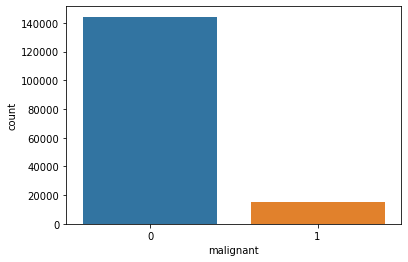

In [8]:
sns.countplot(df_train["malignant"])

The target column is not equally distributed

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

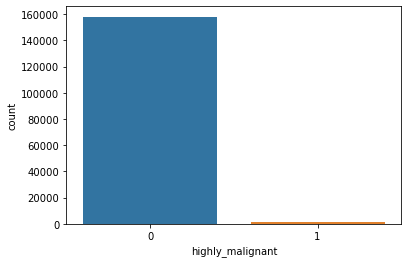

In [9]:
sns.countplot(df_train["highly_malignant"])

very low prpobabliy of comment being malignant

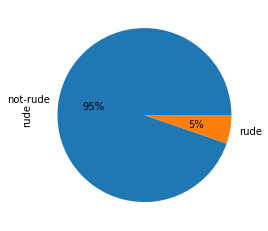

In [10]:
df_train["rude"].value_counts().plot.pie(labels=["not-rude", "rude"], autopct="%1.0f%%")
plt.show()

very low prpobabliy of comment being malignant

<AxesSubplot:xlabel='threat', ylabel='count'>

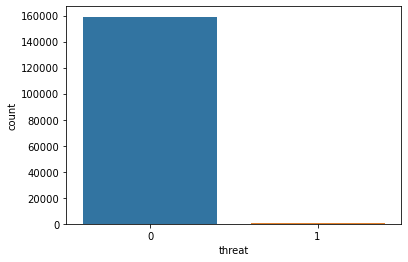

In [11]:
sns.countplot(df_train["threat"])

very low prpobabliy of comment being malignant

<AxesSubplot:xlabel='abuse', ylabel='count'>

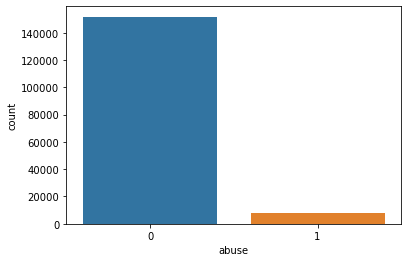

In [12]:
sns.countplot(df_train["abuse"])

very low prpobabliy of comment being malignant

<AxesSubplot:xlabel='loathe', ylabel='count'>

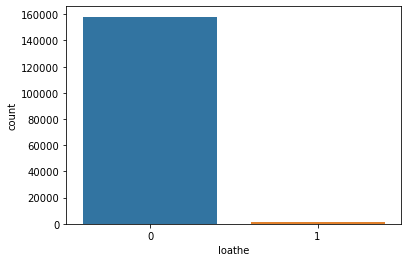

In [13]:
sns.countplot(df_train["loathe"])

very low prpobabliy of comment being malignant

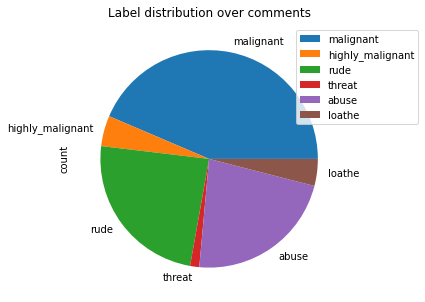

In [14]:
#checking how which comment fall under which category
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = df_train[cols_target].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

<AxesSubplot:>

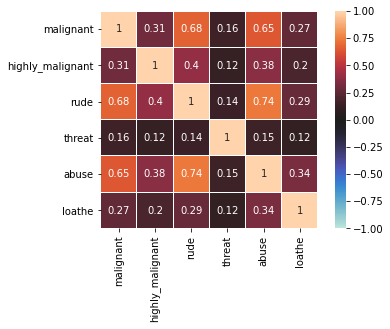

In [15]:
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

In [16]:
cor=df_train.corr()
cor

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

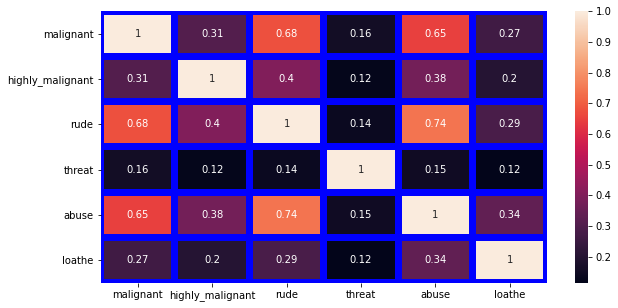

In [17]:
plt.figure(figsize=[10,5])
sns.heatmap(cor,annot=True,linewidths=6,linecolor='b')

There are no columns which is highly negatively correlated  But threat is negatively correlated

In [3]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,2:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

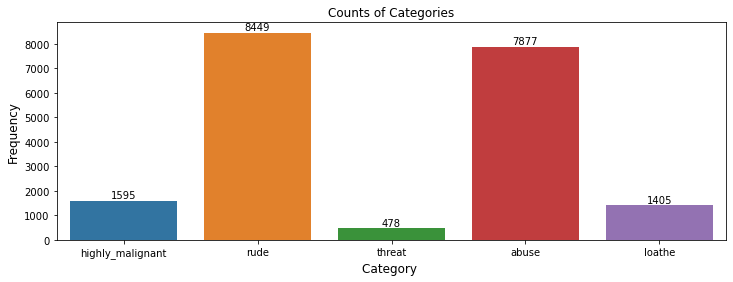

In [19]:
#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Rude comments are the highest among all whereas threat comments are very less. highly-magligant and loathe comments are also present more

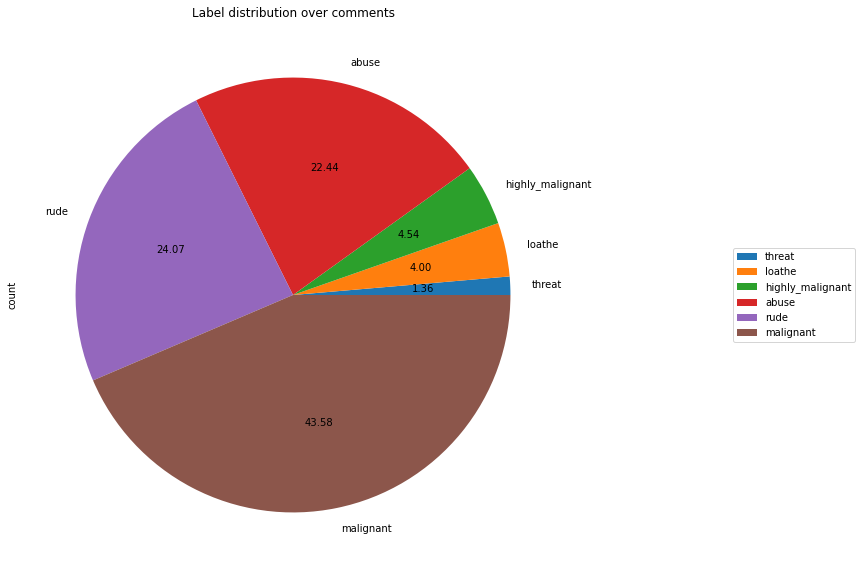

In [20]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train=df_train.apply(LabelEncoder().fit_transform)


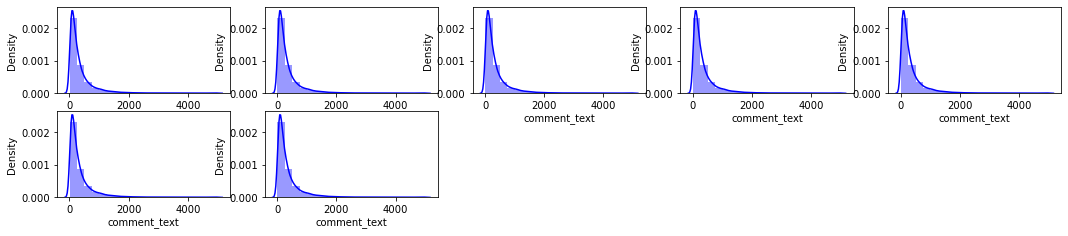

In [21]:
plt.figure(figsize=(18,15))
for i in enumerate(df_train.columns):
    plt.subplot(8,5,i[0]+1)
    comment_len = df_train.comment_text.str.len() 
    sns.distplot(comment_len, bins=20, color = 'blue')
    

In [22]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_train[comments_labels].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [23]:
 #Checking the dataset after adding it
df_train['label']=df_train[comments_labels].sum(axis=1)
df_train.head(10) 

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


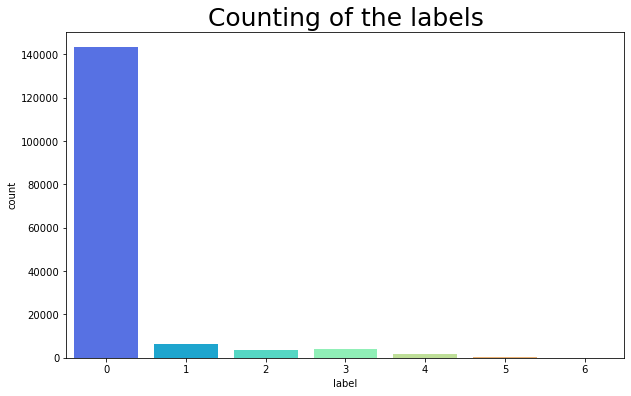

In [24]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df_train['label'], palette='rainbow')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [25]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

# Scaling the label column

In [26]:

df_train['label'] = df_train['label'] >0
df_train['label'] = df_train['label'].astype(int)
df_train.head(15)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143346
1     16225
Name: label, dtype: int64


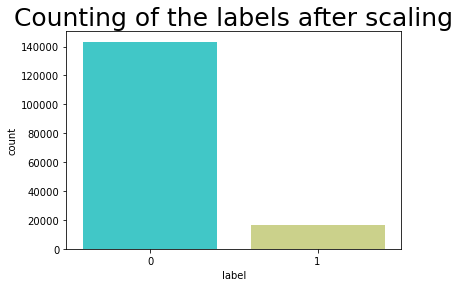

In [27]:
#Checking the counting of labels after scaling
print(df_train['label'].value_counts())
sns.countplot(df_train['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

After scaling the data, we can see that 0 has more weightage and 1 has lesser weightage

In [28]:
#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [29]:
#Creating a column 'length_before_cleaning' in test dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Preprocessing using NLP

In [30]:
!pip install wordcloud

In [31]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [35]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)


In [36]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [37]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [38]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


In [39]:
#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [40]:
#Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [4]:
#Total length removal in test dataset
print('Original Length:',df_test.length_before_cleaning.sum())


Original Length: 55885733


# Plotting wordcloud for each feature

In [42]:
df_malignant=df_train[(df_train['malignant']==1)]
df_malignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
12,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319,197
16,bye look come think comming back tosser,1,0,0,0,0,0,1,57,39
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


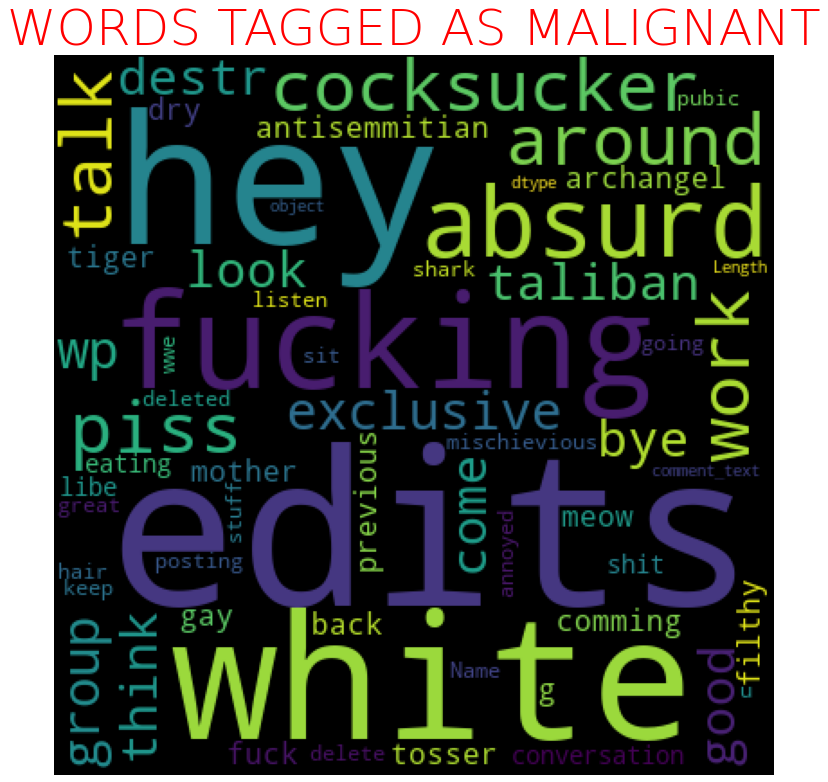

In [43]:
#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [44]:
df_highlymalignant=df_train[(df_train['highly_malignant']==1)]
df_highlymalignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
181,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53,29
442,hi im fucking bitch,1,1,1,0,1,0,1,40,19
579,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67,44
...,...,...,...,...,...,...,...,...,...,...
159096,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251,168
159099,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62,46
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159312,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192,137


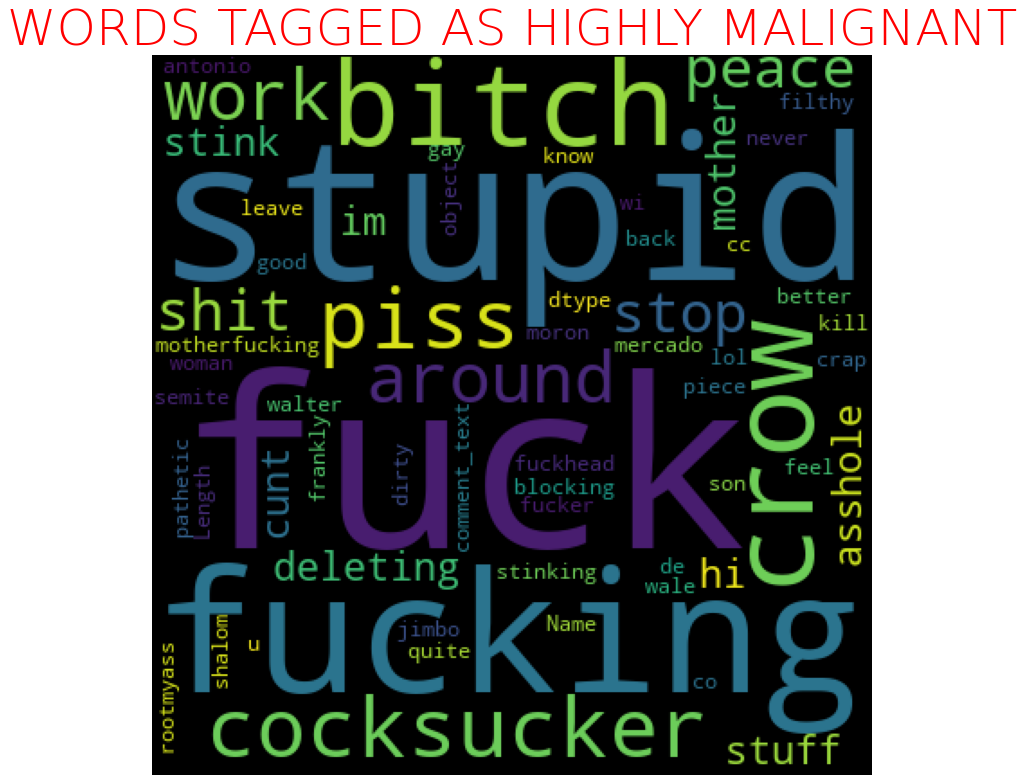

In [45]:
#Plotting for highly_malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()


In [46]:
df_rude=df_train[(df_train['rude']==1)]
df_rude

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
51,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124,75
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
...,...,...,...,...,...,...,...,...,...,...
159411,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91,65
159493,fucking faggot lolwat,1,0,1,0,1,0,1,24,21
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213


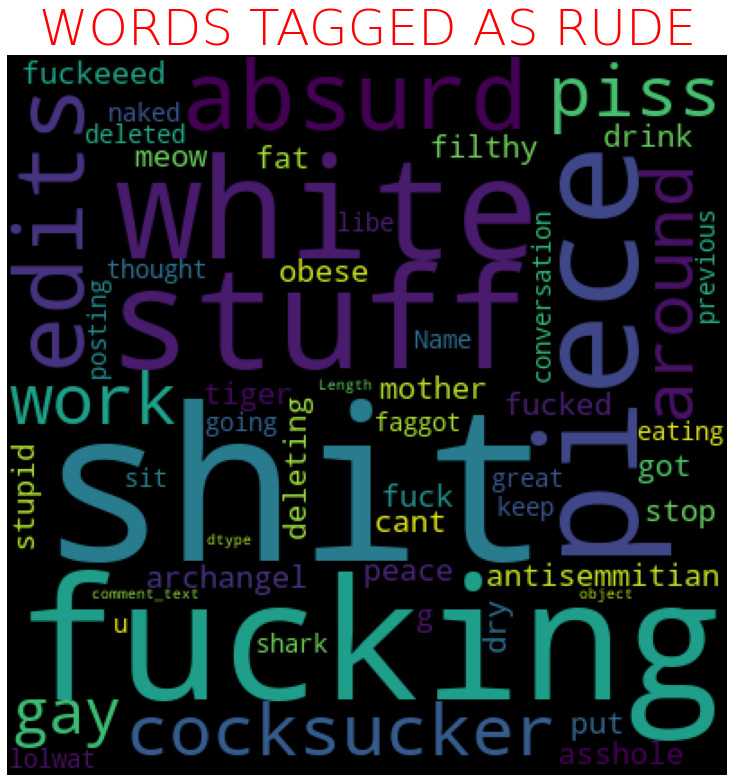

In [47]:
#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()


In [48]:
df_threat=df_train[(df_train['threat']==1)]
df_threat


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
79,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64,43
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
600,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138,66
802,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85,47
1017,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150,75
...,...,...,...,...,...,...,...,...,...,...
157718,bitch fucking hore suck dick big as hole gay f...,1,0,1,1,1,1,1,316,195
158717,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69,48
158856,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212,124
159029,death musulmans,1,0,0,1,0,1,1,19,15


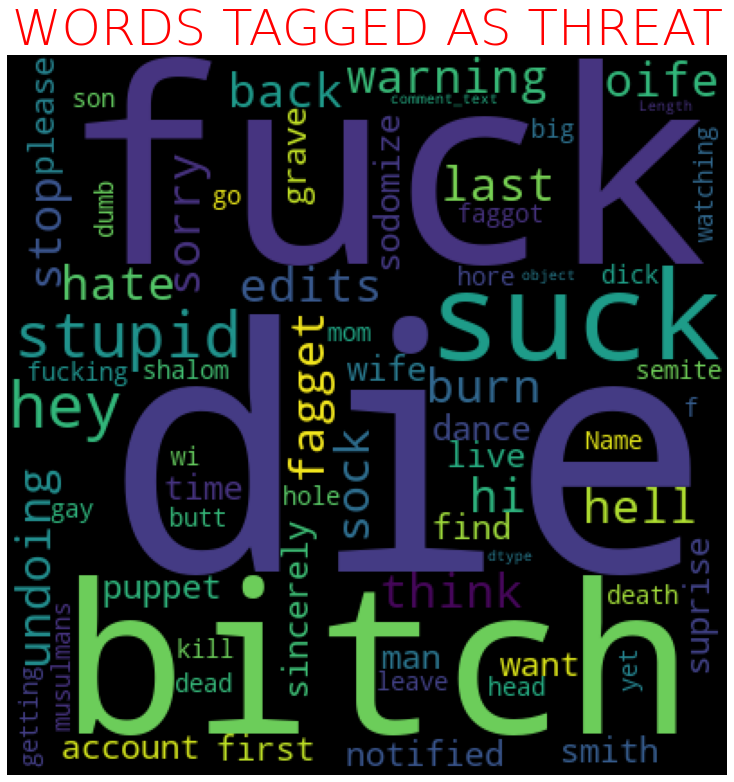

In [50]:
#Plotting for THREAT
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [51]:
df_abuse=df_train[(df_train['abuse']==1)]
df_abuse

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
56,tony sidaway obviously fistfuckee love arm as,1,0,1,0,1,0,1,68,45
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


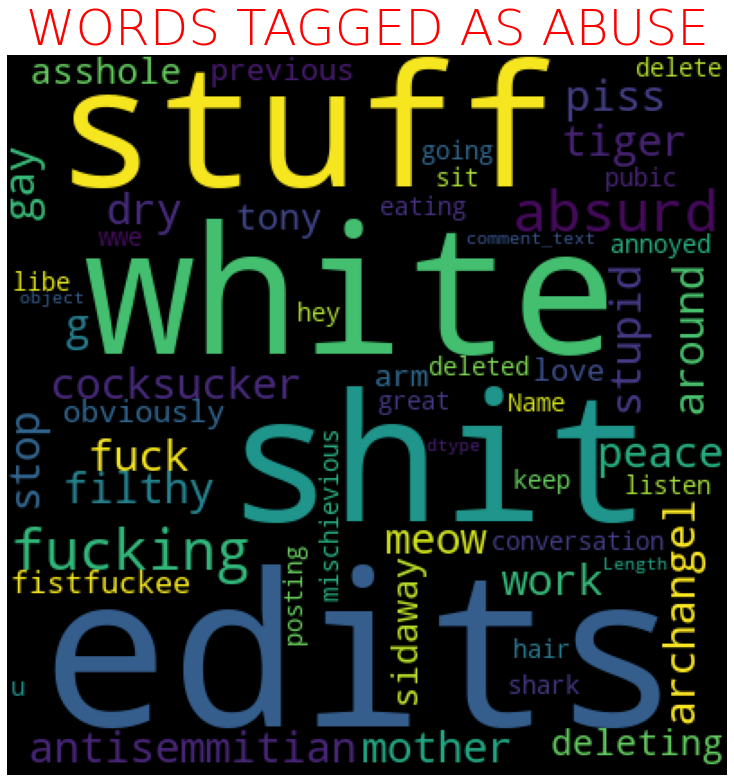

In [52]:
#Plotting for ABUSE
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [53]:
df_loathe=df_train[(df_train['loathe']==1)]
df_loathe

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
105,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42,35
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
218,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120,58
238,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58,51
...,...,...,...,...,...,...,...,...,...,...
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159336,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110,64
159400,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474,265
159449,think gay fag,1,0,0,0,0,1,1,26,13


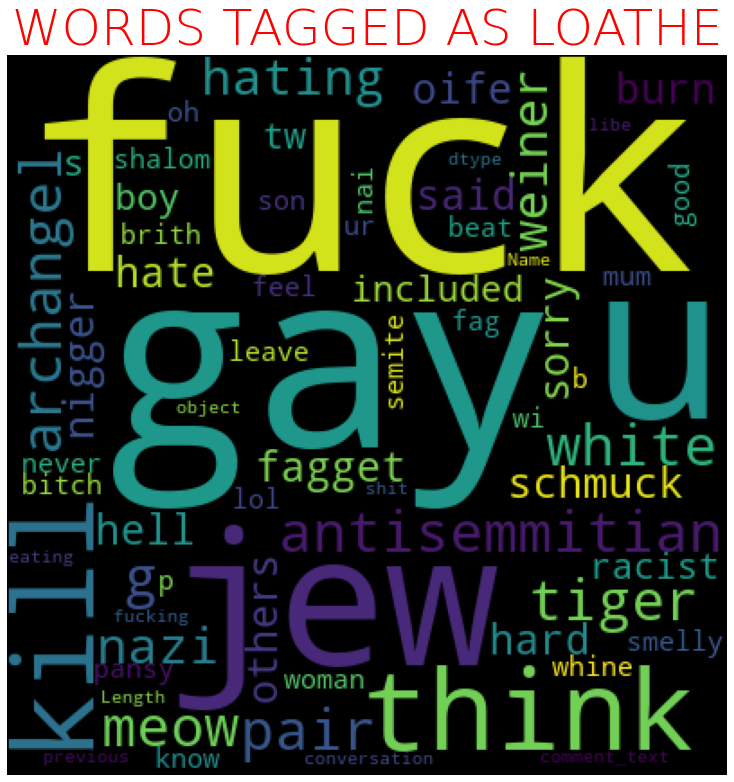

In [54]:
#Plotting for LOATHE
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

# Separating x and y variables

In [55]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [56]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

In [57]:
y=df_train['label']

In [58]:
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(159571, 15000) 		 (159571,)


In [59]:
#Doing the above process for test data 
test_vec = tf_vec.fit_transform(df_test['comment_text'])
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2870432 stored elements in Compressed Sparse Row format>

In [60]:
test_vec.shape

(153164, 15000)

# Model building

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score


In [62]:
#using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value
tf= TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x= features
y= df_train["label"]

In [69]:
# Creating instances for different Classifiers

LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()

In [70]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB',MNB))
models.append(('DecisionTreeClassifier',DT))

In [71]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

*************************** LogisticRegression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  77 is: 0.9563628008021391


Learning Score :  0.9594266734706667
Accuracy Score :  0.9563628008021391
Cross Val Score :  0.97184470562494
roc auc score :  0.8030148558919478


Log loss :  1.5071786892394818


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     43004
           1       0.94      0.61      0.74      4868

    accuracy                           0.96     47872
   macro avg       0.95      0.80      0.86     47872
weighted avg       0.96      0.96      0.95     47872



Confusion Matrix:
 [[42811   193]
 [ 1896  2972]]





*************************** MultinomialNB *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  94 is: 0.9202874331550802


Learning Score :  0.9214227522180145
Accuracy Score :  0.9202

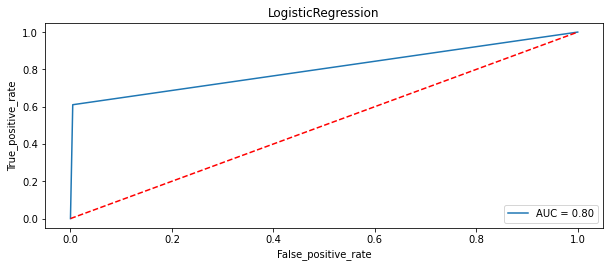

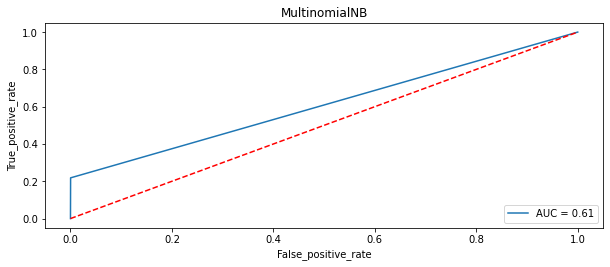

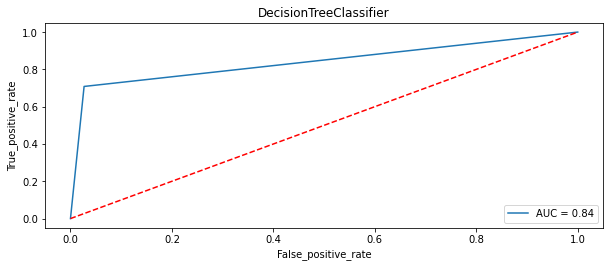

In [75]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')  
    
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss)
    print('\n')

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    

    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [76]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore,'Log_Loss':lg_loss}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve,Log_Loss
0,LogisticRegression,95.942667,95.636280,97.184471,80.301486,1.507179
1,MultinomialNB,92.142275,92.028743,88.302765,60.905452,2.753175
2,DecisionTreeClassifier,99.973142,94.623162,84.193262,84.082328,1.857113


After all this process conclusion is that LogisticRegression. is giving accuracy of 95.6%, So now I am making a final model using LogisticRegression.

# Hyperparameter tunning

In [77]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [78]:
rand_search = RandomizedSearchCV(LR,param_distributions=param,cv=4)

In [79]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [80]:
rand_search.best_params_

{'warm_start': False, 'random_state': 70, 'dual': False}

In [81]:
LR= LogisticRegression(warm_start=False,random_state=50,dual=False)
LR.fit(x_train,y_train)

y_pred1= LR.predict(x_test)

In [82]:
print(" Accuracy score :",accuracy_score(y_test,y_pred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(LR,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

 Accuracy score : 0.9550259024064172 
 Cross_validation_Score : 0.954315005813238 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     43004
           1       0.94      0.60      0.73      4868

    accuracy                           0.96     47872
   macro avg       0.95      0.80      0.85     47872
weighted avg       0.95      0.96      0.95     47872
 Confusion matrix :
 [[42813   191]
 [ 1962  2906]]


In [83]:
log_loss(y_test,y_pred1)

1.553353490586395

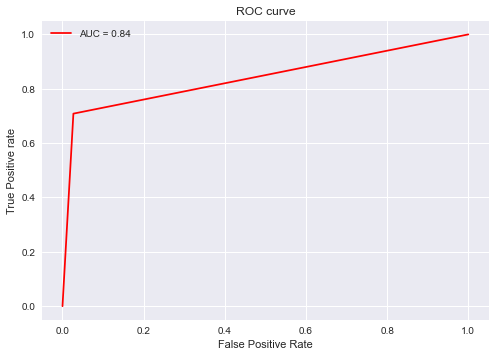

In [87]:
plt.style.use('seaborn')

plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc,color='red')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

# Saving model

In [88]:
import pickle
pickle.dump(LR,open("comment.pk1","wb"))

In [89]:
load_model = pickle.load(open("comment.pk1","rb"))

# verifying model on testing data

In [90]:
testing_data = tf.transform(df_test["comment_text"])

In [91]:
a=LR.predict(testing_data)

In [92]:
pd.DataFrame(a)

,0
0,1
1,0
2,0
3,0
4,0
...,...
153159,1
153160,0
153161,0
153162,0


In [93]:
df_test["label"]=a

In [94]:
df_test

,id,comment_text,length_before_cleaning,label
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,1
1,0000247867823ef7,rfc title fine imo,50,0
2,00013b17ad220c46,source zawe ashton lapland,54,0
3,00017563c3f7919a,look back source information updated correct f...,205,0
4,00017695ad8997eb,anonymously edit article,41,0
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,1
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,0


# saving testing data

In [95]:
df_test.to_csv("malignant_test.csv")